<a href="https://colab.research.google.com/github/royam0820/HuggingFace/blob/main/HF_1_0_Pipeline_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The HuggingFace  🤗  Pipeline Function


The HF pipeline function is a high level api. [Pipelines](https://huggingface.co/transformers/main_classes/pipelines.html) are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. 

The pipeline has the following steps:
- pre-processing: tokenization and numericalization
- model: to fit and train an NLP task
- post-processing: predictions

The pipeline can be used for these NLP tasks:
- Text classification
- Zero-shot classification
- Text generation
- Text completion (mask filling)
- Token classification
- Question-Answering 
- Summarization
- Translation




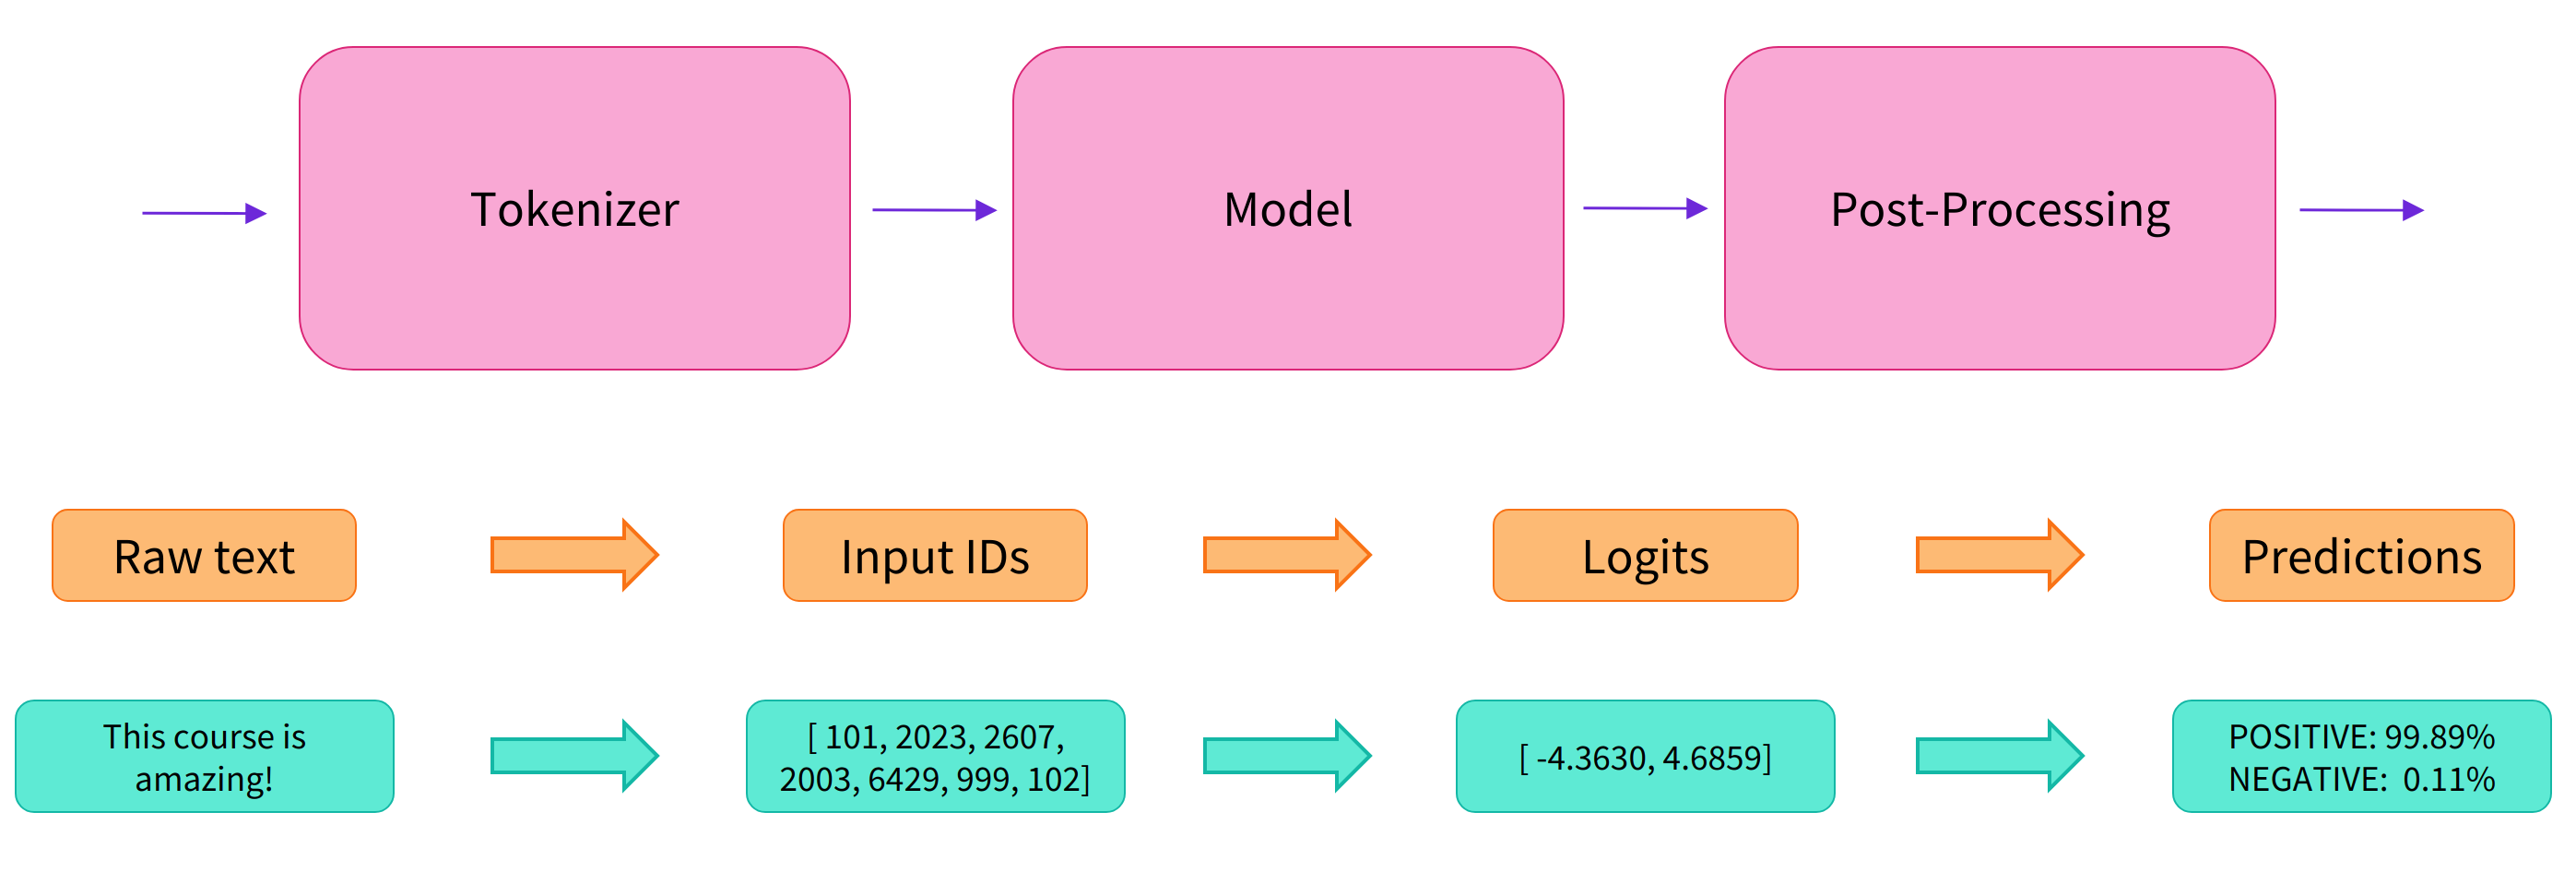

# Imports

In [60]:
!pip install -q transformers -U

NOTE: 🤗 Transformers provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between Jax, PyTorch and TensorFlow.

In [6]:
from transformers import pipeline

## Text Classification

In [7]:
classifier = pipeline("sentiment-analysis")

In [10]:
classifier("I am happy to share this video with you")

[{'label': 'POSITIVE', 'score': 0.999854564666748}]

In [8]:
# checking the model used in the pipeline
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [9]:
# checking the tokenizer used in the pipeline
classifier.tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [11]:
classifier("I am sad that you haven't subscribed to my channel yet")

[{'label': 'NEGATIVE', 'score': 0.9981951117515564}]

In [12]:
# you can also pass muliple texts
classifier(["I am extremely happy to share this video with all of you",
            " Do subscribe to my channel and ",
            " Click on the bell to get notifications for new content"])

[{'label': 'POSITIVE', 'score': 0.9998635053634644},
 {'label': 'NEGATIVE', 'score': 0.9370617270469666},
 {'label': 'NEGATIVE', 'score': 0.9932343363761902}]

## Zero-Shot Classification
It is a more general text classification pipeline, it allows you to provide the level you want.

Zero-Shot Learning is the ability to detect classes that the model has never seen during training. It resembles our ability as humans to generalize and identify new things without explicit supervision.

Ref.: https://arxiv.org/abs/1712.05972



In [13]:
classifier = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [14]:
classifier(["this movie has a lot of cliches",
            "but it is ok to watch"],
           candidate_labels = ["positive", "neutral", "negative"])

[{'labels': ['negative', 'neutral', 'positive'],
  'scores': [0.9204686880111694, 0.043361857533454895, 0.03616946190595627],
  'sequence': 'this movie has a lot of cliches'},
 {'labels': ['positive', 'neutral', 'negative'],
  'scores': [0.49894335865974426, 0.4541124999523163, 0.04694404825568199],
  'sequence': 'but it is ok to watch'}]

In [15]:
classifier("fastai is an excellent MOOC to learn Deep Learning",
           candidate_labels= ["education", "politics", "business"])

{'labels': ['education', 'business', 'politics'],
 'scores': [0.6465710997581482, 0.2819567024707794, 0.07147219777107239],
 'sequence': 'fastai is an excellent MOOC to learn Deep Learning'}

In [16]:
classifier("Donald Trump was the 45th president of the United States (2017–21).",
           candidate_labels= ["education", "politics", "business"])

{'labels': ['politics', 'business', 'education'],
 'scores': [0.9661727547645569, 0.022714681923389435, 0.01111260149627924],
 'sequence': 'Donald Trump was the 45th president of the United States (2017–21).'}

In [17]:
classifier(" Elon Musk's cryptocurrency tweets in the past few weeks have been particularly impactful for bitcoin.",
           candidate_labels= ["education", "politics", "business"])


{'labels': ['business', 'politics', 'education'],
 'scores': [0.8828377723693848, 0.0810488909482956, 0.03611334040760994],
 'sequence': " Elon Musk's cryptocurrency tweets in the past few weeks have been particularly impactful for bitcoin."}

In [18]:
classifier("My brother, James, and my sister, Mary, both had Covid this year",
           candidate_labels= ["family", "education", "politics", "business"])


{'labels': ['family', 'education', 'business', 'politics'],
 'scores': [0.9123957753181458,
  0.05329484865069389,
  0.02735946886241436,
  0.006949862465262413],
 'sequence': 'My brother, James, and my sister, Mary, both had Covid this year'}

## Text Generation
The text-generation pipeline will autocomplete a given prompt using a [gpt2 model](https://huggingface.co/models?pipeline_tag=text-generation). 

Check the [blog post on text generation](https://huggingface.co/blog/how-to-generate) for detailed information.



```
#@param ["Pretrained Pipeline", "Pretrained-GPT2(top_p=0.92, top_k=0)",'Pretrained-GPT2(top_p=0.95, top_k=50)','Pretrained-GPT2(Basic- top_k=0)','Pretrained-GPT2(top_k=0,temperature=0.7)']

```



In [19]:
predictedText = pipeline("text-generation")

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [22]:
# gpt2 model used
predictedText('In this course, we will teach you how to')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to build custom GUI tools by simply executing the following:\n\n#!/usr/bin/env python import os import time import sys import stdin print(sys.gettext("/tmp/%'}]

In [20]:
# cheking the model used
predictedText.model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


In [21]:
# checking the tokenizer used
predictedText.tokenizer

PreTrainedTokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'})

In [23]:
# using another model distilgpt2
predictedText = pipeline("text-generation", model = "distilgpt2")

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [24]:
predictedText('In this course, we will teach you how to',
              max_length=20,
              num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to build a scalable database on the basis of your training'},
 {'generated_text': 'In this course, we will teach you how to get together, from a wide variety of backgrounds to'}]

In [25]:
predictedText('In this course, we will teach you how to', 
              max_length=100, 
              num_beams=5, 
              no_repeat_ngram_size=2, 
              early_stopping=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[{'generated_text': 'In this course, we will teach you how to use the internet to communicate with each other.'}]

### Some Common Parameters for the `generate` method in language generation

`num_beams=5` - Greedy search v.s. beam search. 
- **Greedy search** simply selects the word with the highest probability as its next word.
- **Beam search** reduces the risk of missing hidden high probability word sequences by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. 

NB: it you have a `num_beams=5`, your `num_return_sequences`,if added, must be equal to 5 as well.

`early_stopping=True` so that generation is finished when all beam hypotheses reached the EOS token.

`no_repeat_ngram_size=2` indicates that no n-grams (word sequences of n words) appears twice.
- n-grams (a.k.a word sequences of n words) penalties as introduced by Paulus et al. (2017) and Klein et al. (2017). The most common n-grams penalty makes sure that no n-gram appears twice by manually setting the probability of next words that could create an already seen n-gram to 0.

`do_sample=True` sampling means randomly picking the next word according to its conditional probability distribution.

`temperature` is used to control the randomness of predictions by scaling the logits before applying softmax.It is about increasing the likelihood of high probability words and decreasing the likelihood of low probability words by lowering the so-called temperature of the softmax.

`softmax` The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. The `softmax` transforms output logits values into values between 0 and 1, so that they can be interpreted as probabilities.

Additional infos [here](https://huggingface.co/blog/how-to-generate).

In [26]:
predictedText('As far as I know', 
              max_length=100, 
              num_beams=5, 
              no_repeat_ngram_size=2, 
              early_stopping=True,
              temperature=1.0)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"As far as I know, I don't know what to do with this, but I do know that it's going to take a lot of time to make sure everything is working.\n\nI'm not sure if this will be the first time that I've seen a person who's been in a situation where they're not allowed to go to the bathroom. I'm sure it'll be a long time before that happens."

In [27]:
predictedText("As far I know, I will", 
              do_sample=True, 
              max_length=100, 
              temperature=1.0)[0]['generated_text']


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'As far I know, I will try and prove it!'

In [28]:
# text generation based on a French GPT2 model
from transformers import GPT2Tokenizer, GPT2LMHeadModel
predictedText = pipeline("text-generation", model= GPT2LMHeadModel.from_pretrained("antoiloui/belgpt2"), tokenizer=GPT2Tokenizer.from_pretrained("antoiloui/belgpt2"))

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/974k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/532k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

In [29]:
predictedText('Durant ce cours, on vous apprendra à',
              max_length=20,
              num_return_sequences=1)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Durant ce cours, on vous apprendra à utiliser les outils de base de la programmation orientée objet .'

In [30]:
sentence = "la vie est"

In [31]:
predictedText(sentence,
              max_length=20,
              no_repeat_ngram_size=2, 
              num_return_sequences=1)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"la vie est un roman de l' écrivain français Jean-Paul Dubois , paru en France en 2003"

In [32]:
sentence1=predictedText(sentence,
              max_length=20,
              no_repeat_ngram_size=2, 
              num_return_sequences=1)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [33]:
sentence1

"la vie est un roman de l' écrivain français Jean-Paul Dubois , paru en France en 2003"

### Saving the output

In [34]:
# saving the predicted sentence to a file
with open('result.txt', 'a') as fp:
    fp.write(sentence1)

In [35]:
# # to ignore - editing the generated file to remove 'generated_text' via a unix operation
# import os

# # identifying the file name
# data_file = "result.txt"
# # file modification via the sed unix command
# !sed -i 's/generated_text//' result.txt

NOTE: Tutorial in French regarding the `sed` unix command http://sdz.tdct.org/sdz/la-commande-sed.html

## Text Completion (mask filling)

Using a Bert model.

In [36]:
unmasker = pipeline("fill-mask")

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [37]:
unmasker("this is a <mask>")

[{'score': 0.2257714867591858,
  'sequence': 'this is a typo',
  'token': 31883,
  'token_str': ' typo'},
 {'score': 0.05163164809346199,
  'sequence': 'this is a joke',
  'token': 8018,
  'token_str': ' joke'},
 {'score': 0.050230350345373154,
  'sequence': 'this is a mistake',
  'token': 5021,
  'token_str': ' mistake'},
 {'score': 0.03170887380838394,
  'sequence': 'this is a scam',
  'token': 10656,
  'token_str': ' scam'},
 {'score': 0.025421442463994026,
  'sequence': 'this is a stub',
  'token': 35672,
  'token_str': ' stub'}]

NOTE:  The `<mask>` has been filled with the following words (`typo`, `joke`, `mistake`, `scam`, `stub` (5 filled-masks in total) and their corresponding probabilities (scores).

In [38]:
# requesting only the 2 highest scores
unmasker("this is a <mask>", top_k=2)

[{'score': 0.2257714867591858,
  'sequence': 'this is a typo',
  'token': 31883,
  'token_str': ' typo'},
 {'score': 0.05163164809346199,
  'sequence': 'this is a joke',
  'token': 8018,
  'token_str': ' joke'}]

In [39]:
# another example regarding the 2 highest scores.
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.19619855284690857,
  'sequence': 'This course will teach you all about mathematical models.',
  'token': 30412,
  'token_str': ' mathematical'},
 {'score': 0.04052741825580597,
  'sequence': 'This course will teach you all about computational models.',
  'token': 38163,
  'token_str': ' computational'}]

NOTE: `top_k=2` we want to get the two most likely values for the missing word. The results from the mask are: `mathematical` and `computational`.

In [40]:
unmasker("Paris is the <mask> of France.", top_k=2)

[{'score': 0.6790179014205933,
  'sequence': 'Paris is the capital of France.',
  'token': 812,
  'token_str': ' capital'},
 {'score': 0.05178023502230644,
  'sequence': 'Paris is the birthplace of France.',
  'token': 32357,
  'token_str': ' birthplace'}]

NOTE: `top_k=2` returns `capital` and `birthplace` as filled-mask.

## Token Classification - Name Entity Recognition (NER)

The most common token classification tasks are:

- NER (Named-entity recognition) Classify the entities in the text (person, organization, location...).
- POS (Part-of-speech tagging) Grammatically classify the tokens (noun, verb, adjective...)
- Chunk (Chunking) Grammatically classify the tokens and group them into "chunks" that go together

For this example, we are using Name Entity Recognition (NER. We are going to classify each word in the sentence instead of as the sentence as the whole. This task identifies entities, such as persons (PER), organizations (ORG) or locations (LOC) in a sentence.



In [41]:
ner = pipeline("ner", grouped_entities=True)
#ner = pipeline("ner", aggregation_strategy=True)

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:155: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  f'`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="{aggregation_strategy}"` instead.'


NOTE: `grouped_entities=True` is to make the pipeline group different words linked to the same entity.  Example below the entity PER has grouped two words "Sylvain Gugger".

In [42]:
ner("his name is Sylvain Gugger, he works for HuggingFace in Brooklyn, USA")

[{'end': 26,
  'entity_group': 'PER',
  'score': 0.99872273,
  'start': 12,
  'word': 'Sylvain Gugger'},
 {'end': 52,
  'entity_group': 'ORG',
  'score': 0.9982186,
  'start': 41,
  'word': 'HuggingFace'},
 {'end': 64,
  'entity_group': 'LOC',
  'score': 0.99806863,
  'start': 56,
  'word': 'Brooklyn'},
 {'end': 69,
  'entity_group': 'LOC',
  'score': 0.99907243,
  'start': 66,
  'word': 'USA'}]

## Question-Answering

In [43]:
question_answerer = pipeline("question-answering")

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [44]:
question_answerer(
    question="Who is Salvador Dali?",
    context="Salvador Dalí was a Spanish Surrealist painter and printmaker known for exploring subconscious imagery. Notable works: 'The Persistence of Memory'")

{'answer': 'a Spanish Surrealist painter and printmaker',
 'end': 61,
 'score': 0.6501795053482056,
 'start': 18}

In [51]:
context="Salvador Dalí was a Spanish Surrealist painter and printmaker known for exploring subconscious imagery. Notable works: 'The Persistence of Memory'"

In [54]:
context[18:61]

'a Spanish Surrealist painter and printmaker'

## Text Summarization

In [45]:
summarizer = pipeline("summarization")

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [46]:
summarizer('''Richard Phillips Feynman ForMemRS (/ˈfaɪnmən/; May 11, 1918 – February 15, 1988) was an American theoretical physicist, known for his work in the path integral formulation of quantum mechanics, the theory of quantum electrodynamics, the physics of the superfluidity of supercooled liquid helium, as well as his work in particle physics for which he proposed the parton model. For contributions to the development of quantum electrodynamics, Feynman received the Nobel Prize in Physics in 1965 jointly with Julian Schwinger and Shin'ichirō Tomonaga.

Feynman developed a widely used pictorial representation scheme for the mathematical expressions describing the behavior of subatomic particles, which later became known as Feynman diagrams. During his lifetime, Feynman became one of the best-known scientists in the world. In a 1999 poll of 130 leading physicists worldwide by the British journal Physics World, he was ranked the seventh greatest physicist of all time.[2]

He assisted in the development of the atomic bomb during World War II and became known to a wide public in the 1980s as a member of the Rogers Commission, the panel that investigated the Space Shuttle Challenger disaster. Along with his work in theoretical physics, Feynman has been credited with pioneering the field of quantum computing and introducing the concept of nanotechnology. He held the Richard C. Tolman professorship in theoretical physics at the California Institute of Technology.

Feynman was a keen popularizer of physics through both books and lectures, including a 1959 talk on top-down nanotechnology called There's Plenty of Room at the Bottom and the three-volume publication of his undergraduate lectures, The Feynman Lectures on Physics. Feynman also became known through his semi-autobiographical books Surely You're Joking, Mr. Feynman! and What Do You Care What Other People Think?, and books written about him such as Tuva or Bust! by Ralph Leighton and the biography Genius: The Life and Science of Richard Feynman by James Gleick.''')

[{'summary_text': ' Richard Phillips Feynman ForMemRS was an American theoretical physicist . He received the Nobel Prize in 1965 for his work in the theory of quantum electrodynamics . In a 1999 poll of 130 leading physicists worldwide by the British journal Physics World, he was ranked the seventh greatest physicist of all time .'}]

## Translation

In [ ]:
!pip install transformers sentencepiece #version 0.1.95  

*** WARNING ***
Make sure to restart the kernel after the above installation.

In [2]:
# from French to English
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en", tokenizer="Helsinki-NLP/opus-mt-fr-en")

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

In [3]:
translator("ce cours est très intéressant")

[{'translation_text': 'this course is very interesting'}]

In [4]:
translator('''Une pollution d'hydrocarbures en mer a été détectée à l'Est de la Corse, à environ 10 km de la côte.
Le préfet de Haute-Corse a annoncé samedi avoir activé le plan Polmar-Terre, dédié à la protection du littoral, après la détection d'une pollution hydrocarbures en mer à l'Est de la Corse, à environ 10 km de la côte.''')

[{'translation_text': 'An oil pollution at sea was detected in East Corsica, about 10 km from the coast. The Prefect of Haute-Corse announced on Saturday that he had activated the Polmar-Terre plan, dedicated to the protection of the coast, after the detection of oil pollution at sea in East Corsica, about 10 km from the coast.'}]

# Bias
If your intent is to use a pretrained model or a fine-tuned version in production, please be aware that, while these models are powerful tools, they come with limitations. The biggest of these is that, to enable pretraining on large amounts of data, researchers often scrape all the content they can find, taking the best as well as the worst of what is available on the internet, which can lead to bias. See example below.

In [36]:
unmasker = pipeline("fill-mask", model="bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [37]:
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


# Using the HF pipeline in Google Sheets

## Fill Mask



```
function FILL_MASK(input="THIS IS A [MASK]", repo_id="bert-base-uncased") {
  const endpoint = "https://api-inference.huggingface.co/pipeline/";
  const pipeline = "fill-mask/"

  const payload = JSON.stringify({
    "inputs": input
  });

  const options = {
      "wait_for_model": true,
      'use_gpu': false,
      "method" : "POST",
      "contentType" : "application/json",
      "payload" : payload
    };

  path = endpoint + pipeline + repo_id
  const response = UrlFetchApp.fetch(path, options);
  const data = JSON.parse(response.getContentText());
  return data[0]["sequence"];
}


## Zero-shot Classification



```
// zero-shot classification
function ANALYZE(input, labels, repo_id="facebook/bart-large-mnli") {

  endpoint = "https://api-inference.huggingface.co/models/" + repo_id;

  const payload = JSON.stringify({
    "inputs": input,
    "parameters": {"candidate_labels": labels}});


// Add your token from https://huggingface.co/settings/token**
  const options = {
      "headers":  {"Authorization": "Bearer api_XXXXXXXXX"},
      "wait_for_model": true,
      "use_gpu": false,
      "method" : "POST",
      "contentType" : "application/json",
      "payload" : payload,
      
  };

  const response = UrlFetchApp.fetch(endpoint, options);

  const data = JSON.parse(response.getContentText());

  return data['labels'][0];
}
```



# Resources

[The HF pipeline](https://huggingface.co/transformers/main_classes/pipelines.html)

[The HF Api Reference.](https://api-inference.huggingface.co/docs/python/html/quicktour.html#)

[The HF landing inference-api sign-up](
https://huggingface.co/landing/inference-api/startups)

[HuggingFace Profile Settings](https://huggingface.co/settings/token)

[The Illustrated Transformers by Jay Alammar.](https://jalammar.github.io/illustrated-transformer/)

[Introducing Github CoPilot.](https://github.blog/2021-06-29-introducing-github-copilot-ai-pair-programmer/)

[Your AI programmer. The Github CoPilot project.](https://copilot.github.com/), 



# BONUS - T5 Model
[Exploring Transfer Learning with T5: the Text-To-Text Transfer Transformer](https://ai.googleblog.com/2020/02/exploring-transfer-learning-with-t5.html)

T5 is an encoder-decoder model and converts all NLP problems into a text-to-text format. It is trained using teacher forcing. This means that for training we always need an input sequence and a target sequence. The input sequence is fed to the model using input_ids. The target sequence is shifted to the right, i.e., prepended by a start-sequence token and fed to the decoder using the decoder_input_ids. In teacher-forcing style, the target sequence is then appended by the EOS token and corresponds to the labels. The PAD token is hereby used as the start-sequence token. T5 can be trained / fine-tuned both in a supervised and unsupervised fashion.



In [38]:
# imports
from transformers import T5Tokenizer, T5ForConditionalGeneration

# identifying the tokenizer and the model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

## T5 Translation

In [39]:
# requesting a translation from the t5 small model
input_ids = tokenizer("translate English to French: Studies have been shown that owning a dog is good for you", 
                      return_tensors="pt").input_ids 

In [40]:
# generating an output, that is a translation
generated_ids = model.generate(input_ids)

In [41]:
generated_ids

tensor([[    0,  2973, 17868,    30,    17, 29625,   238,    50, 19713,     3,
            26,    22,   202, 17826,   259,  4079,   171,   327,     1]])

In [42]:
# checking the translated text generated
preds = [
         tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
         for gen_id in generated_ids
]

In [43]:
preds

['Des études ont montré que la propriété d’un chien est bonne pour vous']

In [44]:
# pretty print
"".join(preds)

'Des études ont montré que la propriété d’un chien est bonne pour vous'

NOTE: Google translate gives the following output: "Des études ont montré que posséder un chien est bon pour vous"!

NB: we are using a T5 small model.

## T5 summarization

In [45]:
text = '''Charles Robert Watts (2 June 1941 – 24 August 2021) was an English musician who achieved international fame as the drummer 
of the Rolling Stones from 1963 until his death in 2021. One of the band's core members, Watts, 
alongside lead vocalist and frontman Mick Jagger and guitarist Keith Richards, were the only members of the band 
to perform on all of their studio albums. He cited jazz as a major influence on his drumming style.'''

In [46]:
input_ids = tokenizer(text, 
                      return_tensors="pt").input_ids 

In [47]:
input_ids

tensor([[ 5417,  2715, 18017,     7,  4743,  1515, 24822,     3,   104,   997,
          1660,   460,  2658,    61,    47,    46,  1566, 16244,   113,  5153,
          1038, 10393,    38,     8, 26726,    13,     8,  6070,    53,  5614,
             7,    45, 20613,   552,   112,  1687,    16,   460,  2658,     5,
           555,    13,     8,  1928,    31,     7,  2583,   724,     6, 18017,
             7,     6,  5815,   991,  6721,   343,    11,   851,   348, 25665,
          2215,  6938,    11, 23317, 17017,  4117,     7,     6,   130,     8,
           163,   724,    13,     8,  1928,    12,  1912,    30,    66,    13,
            70,  3100, 14234,     5,   216,     3, 11675,  9948,    38,     3,
             9,   779,  2860,    30,   112,  5253,    51,    53,   869,     5,
             1]])

In [48]:
len(tokenizer(text)['input_ids'])

101

In [49]:
generated_ids = model.generate(input_ids)

In [50]:
generated_ids

tensor([[    0, 32099,    47,    46,  1566, 16244,   113,  5153,  1038, 10393,
            38,     8, 26726,    13,     8,  6070,    53,  5614,     7,    45]])

In [51]:
# checking the summarized text generated
preds = [
         tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
         for gen_id in generated_ids
]

In [52]:
preds

['was an English musician who achieved international fame as the drummer of the Rolling Stones from']

In [53]:
# generating a better summarized text by adding a few arguments.
summary_ids = model.generate(input_ids, min_length=80,
                             max_length=150,
                             length_penalty=20, 
                             num_beams=2)

# avoiding the for loop to get the summarization result
summary = tokenizer.decode(input_ids[0], skip_special_tokens=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [54]:
summary

"Charles Robert Watts (2 June 1941 – 24 August 2021) was an English musician who achieved international fame as the drummer of the Rolling Stones from 1963 until his death in 2021. One of the band's core members, Watts, alongside lead vocalist and frontman Mick Jagger and guitarist Keith Richards, were the only members of the band to perform on all of their studio albums. He cited jazz as a major influence on his drumming style."

# BONUS -- Sentiment Analysis on Tweets
Ref.: https://github.com/ValdazoAmerico/transformers-pipeline/blob/main/transformers_pipeline.ipynb


## Imports

In [55]:
!pip install -q transformers -U

In [56]:
from transformers import pipeline

In [57]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import twitter_samples

## Sentiment Classifier Pipeline 

In [58]:
# using the sentiment classifier pipeline
classifier = pipeline("sentiment-analysis")

In [59]:
# downloading tweets samples classified as positive or negative
nltk.download('twitter_samples',download_dir="/content")

[nltk_data] Downloading package twitter_samples to /content...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [60]:
# creating a list of positive and negative tweets from json files.
documents = ([(t, "POSITIVE") for t in twitter_samples.strings("/content/corpora/twitter_samples/positive_tweets.json")] +
             [(t, "neg") for t in twitter_samples.strings("/content/corpora/twitter_samples/negative_tweets.json")])


In [61]:
type(documents)

list

In [62]:
documents[:6]

[('#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
  'POSITIVE'),
 ('@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
  'POSITIVE'),
 ('@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
  'POSITIVE'),
 ('@97sides CONGRATS :)', 'POSITIVE'),
 ('yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
  'POSITIVE'),
 ('@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
  'POSITIVE')]

In [63]:
# creating a dataframe from the documents list
df = pd.DataFrame(documents, columns=['tweet','label'])

In [64]:
# checking the dataframe shape (2 columns)
df.shape

(10000, 2)

In [65]:
# checking the value counts for neg and POSITIVE labels
df['label'].value_counts()

neg         5000
POSITIVE    5000
Name: label, dtype: int64

In [66]:
# converting the df dataframe into a list called 'tweets'
tweets = df.tweet.tolist()

In [67]:
type(tweets)

list

In [68]:
tweets[0:5]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

In [69]:
# calling the sentiment analysis on one tweet to get a score
classifier(tweets[2])

[{'label': 'POSITIVE', 'score': 0.999620258808136}]

In [70]:
# calling the sentiment analysis classifier on 100 tweets to get a score for each tweet
pred = []
for i in tweets[0:100]:
  pred.append(classifier(i))

In [71]:
# checking the pred list length
len(pred)

100

In [72]:
# checking a prediction
pred[:6]

[[{'label': 'POSITIVE', 'score': 0.9260644912719727}],
 [{'label': 'POSITIVE', 'score': 0.9991611838340759}],
 [{'label': 'POSITIVE', 'score': 0.999620258808136}],
 [{'label': 'POSITIVE', 'score': 0.9924265146255493}],
 [{'label': 'NEGATIVE', 'score': 0.972594678401947}],
 [{'label': 'POSITIVE', 'score': 0.9995020627975464}]]

In [73]:
# creating a new dataframe 
# containing the columns tweet, and label
df_new = df[0:100]

In [74]:
type(df_new)

pandas.core.frame.DataFrame

In [75]:
df_new

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :),POSITIVE
1,@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!,POSITIVE
2,@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!,POSITIVE
3,@97sides CONGRATS :),POSITIVE
4,yeaaaah yippppy!!! my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days,POSITIVE
...,...,...
95,Those friends know themselves :),POSITIVE
96,waiting for nudes :-),POSITIVE
97,@JacobWhitesides go sleep u ! :))))))))),POSITIVE
98,Stats for the day have arrived. 1 new follower and NO unfollowers :) via http://t.co/RB8pMNgMEo.,POSITIVE


In [76]:
# generating a list of prediction values for the tweets being classified
pred_label = []
for p in pred:
  pred_label.append((p[0]['label']))

In [77]:
pred_label[0]

'POSITIVE'

In [78]:
# adding a new colum "pred" for the df_new dataframe
# this column will hold the prediction values from the list pred_label
df_new['pred'] = pred_label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
# displaying the new dataframe with columns tweet, label and pred
df_new

,tweet,label,pred
0,#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :),POSITIVE,POSITIVE
1,@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!,POSITIVE,POSITIVE
2,@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!,POSITIVE,POSITIVE
3,@97sides CONGRATS :),POSITIVE,POSITIVE
4,yeaaaah yippppy!!! my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days,POSITIVE,NEGATIVE
...,...,...,...
95,Those friends know themselves :),POSITIVE,POSITIVE
96,waiting for nudes :-),POSITIVE,NEGATIVE
97,@JacobWhitesides go sleep u ! :))))))))),POSITIVE,NEGATIVE
98,Stats for the day have arrived. 1 new follower and NO unfollowers :) via http://t.co/RB8pMNgMEo.,POSITIVE,NEGATIVE


In [80]:
# changing the pandas max_colwidth to its whole length to better check the tweet text
pd.set_option("display.max_colwidth", None)

In [81]:
# checking why row 4 and 98 have negative predictions
print(df.iloc[4][['tweet']])
print(df.iloc[98][['tweet']])
# checking why row 99 has positive prediction
print(df.iloc[99][['tweet']])

tweet    yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Name: 4, dtype: object
tweet    Stats for the day have arrived. 1 new follower and NO unfollowers :) via http://t.co/RB8pMNgMEo.
Name: 98, dtype: object
tweet    My birthday is a week today! :D
Name: 99, dtype: object


In [82]:
# applying a metric accuracy in regardsto the df_new columns label and pred
from sklearn.metrics import accuracy_score
accuracy_score(df_new['label'], df_new['pred'])

0.56